In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
from IPython.display import display
from scipy.interpolate import UnivariateSpline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


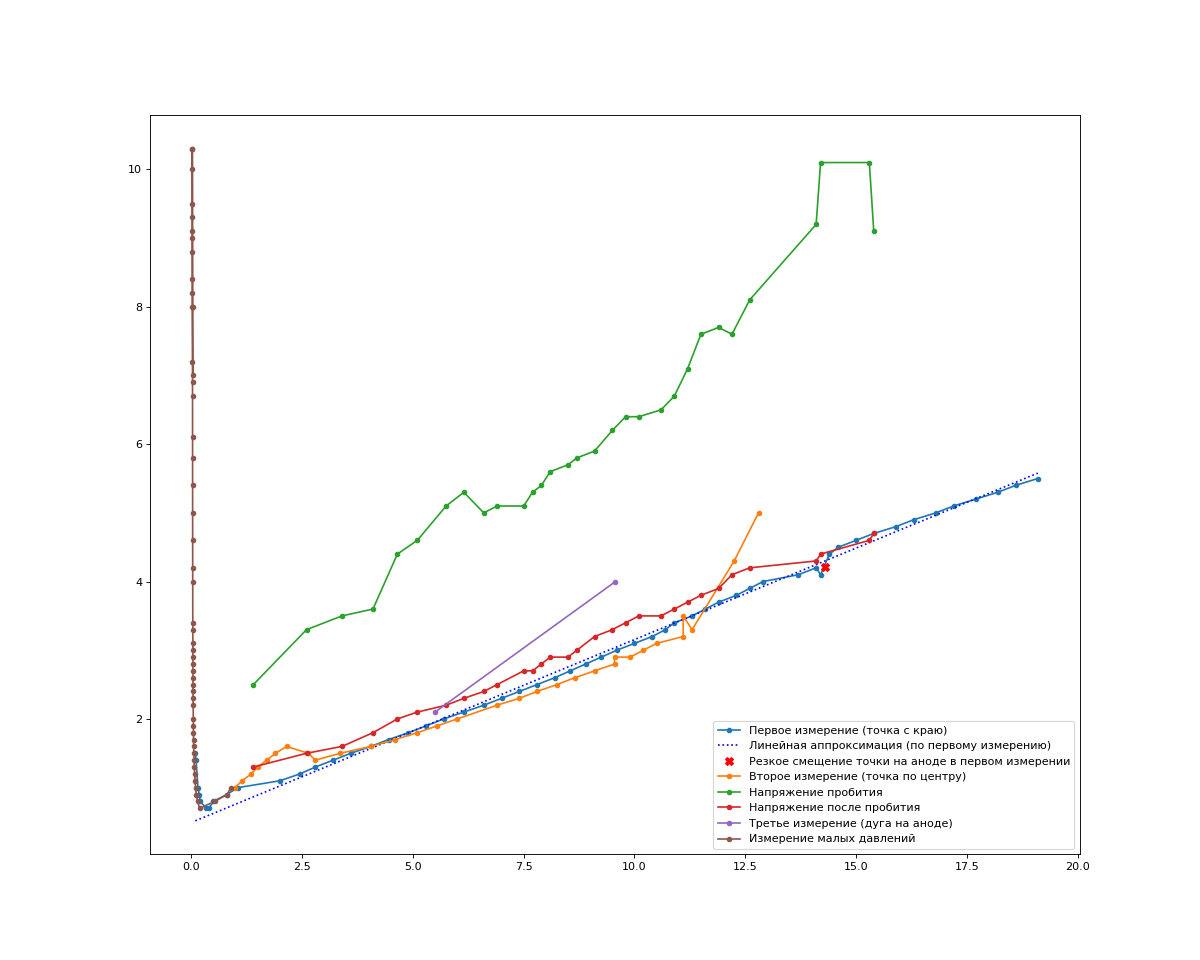

In [14]:
%matplotlib widget

def plot_and_save_all(funcs):
    for f in funcs:
        f()
        plt.legend()
        plt.savefig(f.__name__ + '.png')
        plt.clf()
    
    for f in funcs:
        f()

plt.figure(figsize=(15, 12), dpi=80)

def first():
    first = pd.read_csv('1.csv', delimiter=';', comment='#')
    P, U = first['P'], first['U']
    U_spline = UnivariateSpline(P, U, s=0)
    plt.plot(P, U, '-o', markersize=4, label='Первое измерение (точка с краю)')
    res_1, _ = curve_fit(lambda x, a, b: a*x + b, P[10:], U[10:])
    plt.plot(P, res_1[0]*P + res_1[1], ':', c='blue', label='Линейная аппроксимация (по первому измерению)')
    
    plt.plot(14.3, U_spline(14.3), 'X', markersize=8, c='red', label='Резкое смещение точки на аноде в первом измерении')

def second():
    second = pd.read_csv('2.csv', delimiter=';', comment='#')
    P, U = second['P'], second['U']
    plt.plot(P, U, '-o', markersize=4, label='Второе измерение (точка по центру)')
    
def third():
    plt.plot([5.5, 9.57], [2.1, 4], '-o', markersize=4, label='Третье измерение (дуга на аноде)')

plt.legend()

plt.xlabel('P, мбар')
plt.ylabel('U, кВ')

def at_break():
    break_ = pd.read_csv('break.csv', delimiter=';', comment='#')
    P, U, B = break_['P'], break_['U'], break_['B'] 


    plt.plot(P, B, '-o', markersize=4, label="Напряжение пробития")
    plt.plot(P, U, '-o', markersize=4, label="Напряжение после пробития")

def plot_low():
    low =  pd.read_csv('low.csv', delimiter=';', comment='#')
    P, U = low['P'], low['U']
    plt.plot(P, U, '-o', markersize=4, label="Измерение малых давлений")

plt.xlabel('P, мбар')
plt.ylabel('U, кВ')


plot_and_save_all([first, second, at_break])

third()
plot_low()

plt.legend()


plt.savefig('all.png')


-2.926632049911624 0.00017512620094303476
-0.7647346047656662 0.1705329910251019
Минимальное напряжение наблюдается на: 0.19 0.7


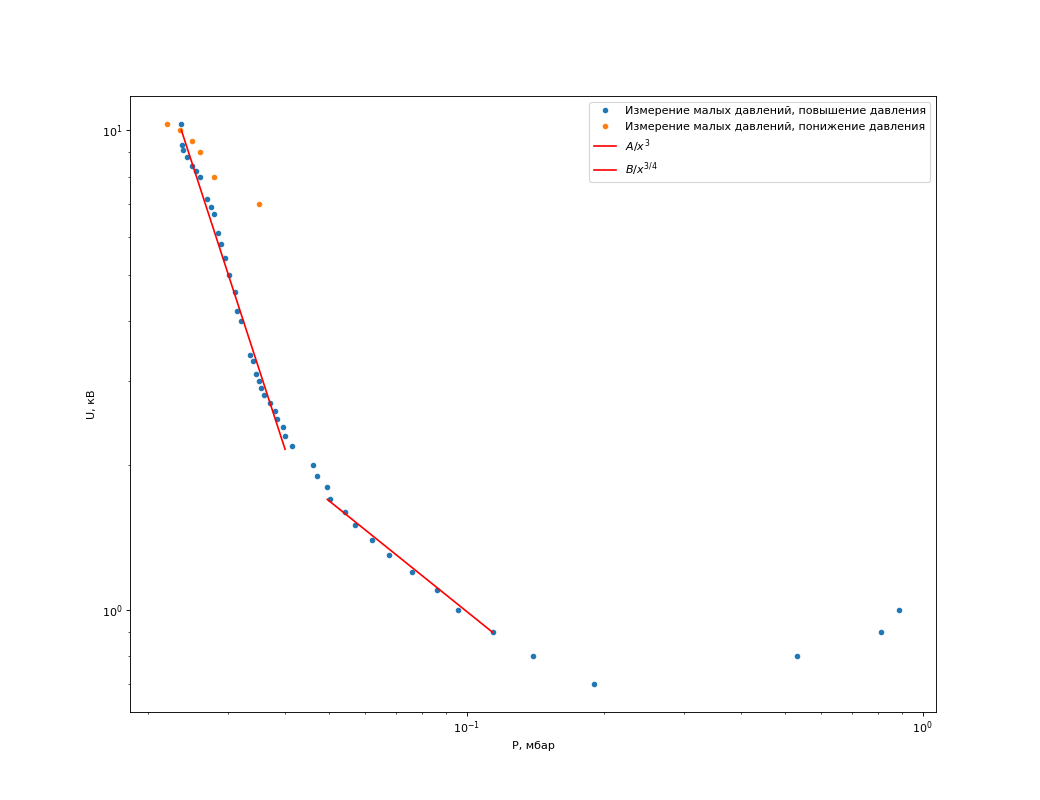

In [3]:
%matplotlib widget
import scipy

from scipy.interpolate import lagrange


plt.figure(2, figsize=(13, 10), dpi=80)
P, U = np.array(low['P']), np.array(low['U'])
ind = np.nonzero(U == 10.3)[0][1]

plt.plot(P[ind:], U[ind:], 'o', markersize=4, label="Измерение малых давлений, повышение давления")
plt.plot(P[:ind], U[:ind], 'o', markersize=4, label="Измерение малых давлений, понижение давления")

###
f = lambda x, a, b: -a*x + b
res, _ = curve_fit(f, np.log(P[ind:-18]), np.log(U[ind:-18]), maxfev=10_000)
plt.plot(P[ind:-18], np.exp(f(np.log(P[ind:-18]), *res)), color='red', label='$A/x^3$')

print(-res[0], np.exp(res[1]))

res, _ = curve_fit(f, np.log(P[-15:-4]), np.log(U[-15:-4]), maxfev=10_000)
plt.plot(P[-15:-5], np.exp(f(np.log(P[-15:-5]), *res)), color='red', label='$B/x^{3/4}$')

print(-res[0], np.exp(res[1]))

###

###
#P, U = P[ind:], U[ind:]

#spl = UnivariateSpline(np.log(P), np.log(U), s=0.1, k=2)
#p_all = np.linspace(P[0], P[-1], 1000)

# plt.plot(p_all, np.exp(spl(np.log(p_all))))

#selected = P[0], P[15], P[30], P[40], P[43], P[-1]
#plt.scatter(selected, np.exp(spl(np.log(selected))))

#spl = lagrange(np.log(selected), spl(np.log(selected)))

#plt.plot(p_all, np.exp(spl(np.log(p_all))))
###

plt.loglog()
plt.xlabel('P, мбар')
plt.ylabel('U, кВ')
plt.legend()

plt.savefig('small.png')

print('Минимальное напряжение наблюдается на:', P[np.argmin(U)], np.min(U))


2.0145567845202796


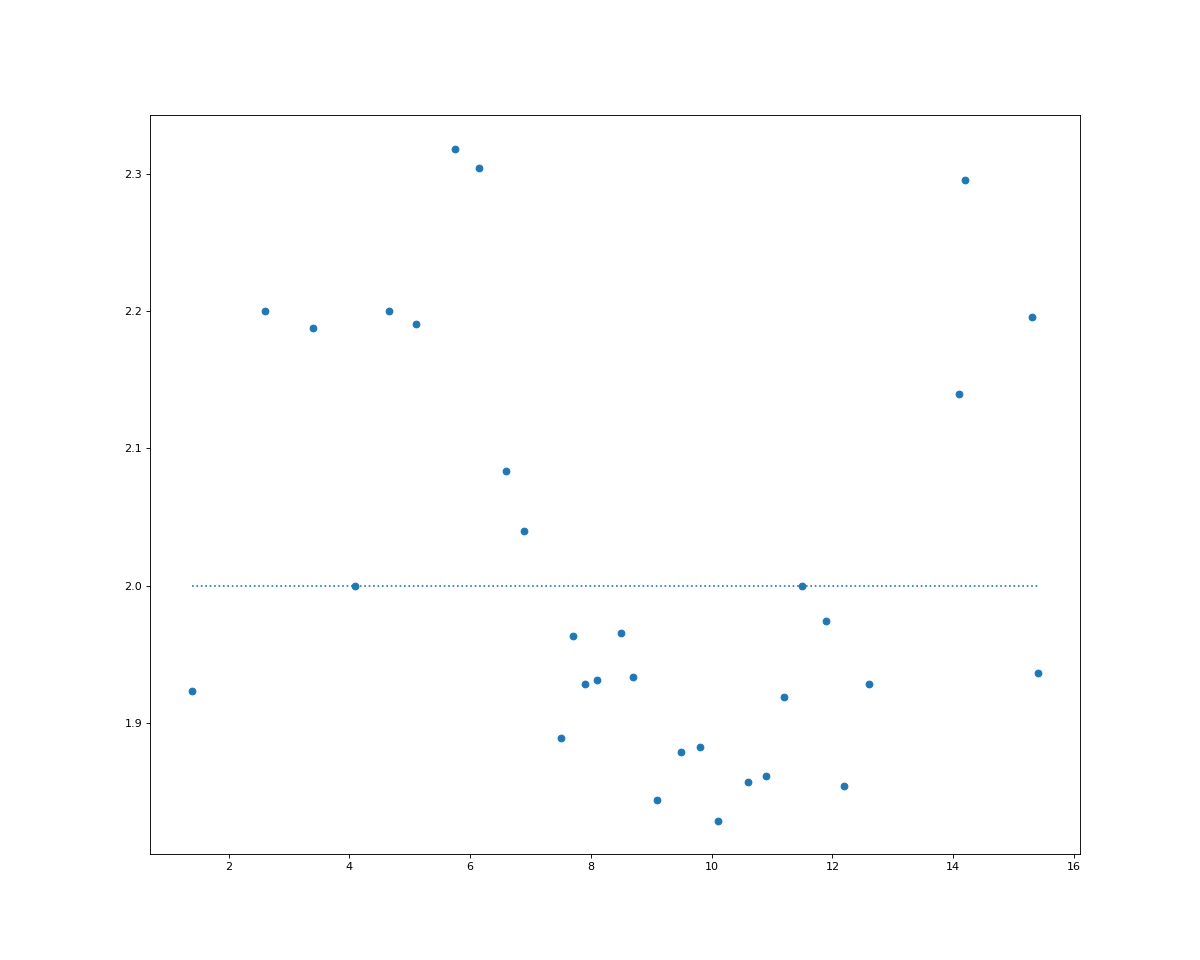

In [4]:
%matplotlib widget
plt.figure(figsize=(15, 12), dpi=80)
P, U, B = break_['P'], break_['U'], break_['B'] 

plt.scatter(P, B/U)
plt.hlines(2, np.min(P), np.max(P), linestyle=':')

print(np.average(B/U))

plt.savefig('PB.png')

In [5]:
c = 5e3/6 # Дж/кг/К
d = 40e-3
L = 400e-3
m = 1.2*np.pi*(d/2)**2*L*1e-2

10/(c*m)

1989.4367886486914

In [11]:
plot_first.

'<function plot_first at 0x00000196F5F75A20>'